# Data Wrangling


## Î™©Ìëú:

Ïù¥ Ïã§ÏäµÏùÑ ÏôÑÎ£åÌïú ÌõÑ, Îã§ÏùåÏùÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§:

* ÎàÑÎùΩÎêú Í∞í Ï≤òÎ¶¨  
* Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏàòÏ†ï  
* Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî Î∞è Ï†ïÍ∑úÌôî


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href=#1>ÎàÑÎùΩÎêú Í∞í ÏãùÎ≥Ñ Î∞è Ï≤òÎ¶¨</a>
        <ul>
            <li><a href=#1-1>ÎàÑÎùΩÎêú Í∞í ÏãùÎ≥Ñ</a></li>
            <li><a href=#1-2>ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨</a></li>
            <li><a href=#1-3>Data Format ÏàòÏ†ï</a></li>
        </ul>
    </li>
    <li><a href=#2>Data standardization</a></li>
    <li><a href=#3>Data normalization (centering/scaling)</a></li>
    <li><a href=#4>Íµ¨Í∞ÑÌôî: Binning</a></li>
    <li><a href=#5>Indicator variable</a></li>
</ul>
    
</div>
 
<hr>


In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(file_path, names = headers)

In [4]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

<a id=1></a>  

# ÎàÑÎùΩÎêú Í∞í ÏãùÎ≥Ñ Î∞è Ï≤òÎ¶¨  

### ÎàÑÎùΩÎêú Í∞í ÏãùÎ≥Ñ  
<h4>"?"Î•º NaNÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞</h4>  
ÏûêÎèôÏ∞® Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÏÑú ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Îäî "?"Î°ú ÌëúÏãúÎê©ÎãàÎã§.  
Ïö∞Î¶¨Îäî "?"Î•º NaN(Not a Number)ÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§. NaNÏùÄ ÌååÏù¥Ïç¨ÏóêÏÑú Í≥ÑÏÇ∞ ÏÜçÎèÑÏôÄ Ìé∏ÏùòÏÑ±ÏùÑ ÏúÑÌï¥ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî ÎàÑÎùΩÍ∞í ÌëúÏãúÏûêÏûÖÎãàÎã§. ÏïÑÎûò Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ AÎ•º BÎ°ú ÎåÄÏ≤¥Ìï† Ïàò ÏûàÏäµÎãàÎã§:  
<pre>.replace(A, B, inplace = True)</pre>  


In [5]:
import numpy as np

# replace "?" to NaN

df.replace("?", np.nan, inplace=True)
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

<h4>ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä</h4> {ÏòÅÌïú}  

ÎàÑÎùΩÎêú Í∞íÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î≥ÄÌôòÎê©ÎãàÎã§. ÏïÑÎûò Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥Îü¨Ìïú ÎàÑÎùΩÎêú Í∞íÏùÑ ÏãùÎ≥ÑÌï† Ïàò ÏûàÏäµÎãàÎã§. ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Î•º Í∞êÏßÄÌïòÎäî Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§:  
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>  
Ï∂úÎ†•Í∞íÏùÄ Ï†ÑÎã¨Îêú Í∞íÏù¥ Ïã§Ï†úÎ°ú ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî **Î∂àÎ¶¨Ïñ∏(boolean)Í∞í** ÏûÖÎãàÎã§.  

In [6]:
missing_data = df.isnull()
missing_data.head(5)

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        False  False   False              False       False     False   
1        False  False   False              False       False     False   
2        False  False   False              False       False     False   
3        False  False   False              False       False     False   
4        False  False   False              False       False     False   

   city-mpg  highway-mpg  price  
0     False        False  False  
1     False        False  False  
2     False        False  False  
3     False        False  False  
4     False        False  False  

[5 rows x 26 columns]

"True"Îäî Ìï¥Îãπ Í∞íÏù¥ ÎàÑÎùΩÎêú Í∞íÏûÑÏùÑ ÏùòÎØ∏ÌïòÎ©∞, "False"Îäî Ìï¥Îãπ Í∞íÏù¥ ÎàÑÎùΩÎêòÏßÄ ÏïäÏïòÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

<h4>Í∞Å Ïó¥Ïùò ÎàÑÎùΩÎêú Í∞í Í∞úÏàò ÏÑ∏Í∏∞</h4> {ÏòÅÌïú}  
<p>  
ÌååÏù¥Ïç¨Ïùò for Î£®ÌîÑÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Í∞Å Ïó¥ÏóêÏÑú ÎàÑÎùΩÎêú Í∞íÏùò Í∞úÏàòÎ•º Îπ†Î•¥Í≤å ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑÏóêÏÑú Ïñ∏Í∏âÌñàÎìØÏù¥, "True"Îäî ÎàÑÎùΩÎêú Í∞íÏùÑ ÎÇòÌÉÄÎÇ¥Í≥† "False"Îäî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Í∞íÏù¥ Ï°¥Ïû¨Ìï®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.  
for Î£®ÌîÑÏùò Î≥∏Î¨∏ÏóêÏÑúÎäî Î©îÏÑúÎìú <code>.value_counts()</code>Î•º ÏÇ¨Ïö©ÌïòÏó¨ "True" Í∞íÏùò Í∞úÏàòÎ•º ÏÖâÎãàÎã§.  
</p>  

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<a id=1-2></a>
### ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
<b>ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï¥Ïïº Ìï†ÍπåÏöî?</b>  

<ol>
    <li>Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú<br>
        a. Ï†ÑÏ≤¥ Ìñâ ÏÇ≠Ï†ú<br>
        b. Ï†ÑÏ≤¥ Ïó¥ ÏÇ≠Ï†ú
    </li>
    <li>Îç∞Ïù¥ÌÑ∞ ÎåÄÏ≤¥<br>
        a. ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥<br>
        b. ÎπàÎèÑÍ∞íÏúºÎ°ú ÎåÄÏ≤¥<br>
        c. Îã§Î•∏ Ìï®Ïàò Í∏∞Î∞òÏúºÎ°ú ÎåÄÏ≤¥
    </li>
</ol>  

<div class='alert alert-block alert-warning'>
Ï†ÑÏ≤¥ Ïó¥ÏùÑ ÏÇ≠Ï†úÌïòÎäî Í≤ÉÏùÄ Ïó¥Ïùò ÎåÄÎ∂ÄÎ∂ÑÏùò Í∞íÏù¥ ÎπÑÏñ¥ ÏûàÏùÑ ÎïåÎßå Í∂åÏû•Îê©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÏÑúÎäî Ïñ¥Îäê Ïó¥ÎèÑ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏúºÎØÄÎ°ú ÏôÑÏ†ÑÌûà ÏÇ≠Ï†úÌï† ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§.  

ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÏ≤¥Ìï† Î∞©Î≤ïÏùÑ ÏÑ†ÌÉùÌï† Ïàò ÏûàÎäî ÏûêÏú†Í∞Ä ÏûàÏßÄÎßå, ÏùºÎ∂Ä Î∞©Î≤ïÏùÄ Îã§Î•∏ Î∞©Î≤ïÎ≥¥Îã§ Îçî Ìï©Î¶¨Ï†ÅÏúºÎ°ú Î≥¥Ïùº Ïàò ÏûàÏäµÎãàÎã§. Í∞Å Î∞©Î≤ïÏùÑ Îã§Î•∏ Ïó¥Ïóê Ï†ÅÏö©ÌïòÏÑ∏Ïöî:  

<b>ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥:</b>  
<ul>
    <li>"normalized-losses": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 41Í∞ú, ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥</li>
    <li>"stroke": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 4Í∞ú, ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥</li>
    <li>"bore": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 4Í∞ú, ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥</li>
    <li>"horsepower": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 2Í∞ú, ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥</li>
    <li>"peak-rpm": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 2Í∞ú, ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥</li>
</ul>

<b>ÎπàÎèÑÍ∞íÏúºÎ°ú ÎåÄÏ≤¥:</b>  
<ul>
    <li>"num-of-doors": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 2Í∞ú, "four"Î°ú ÎåÄÏ≤¥  
        <ul>
            <li>Ïù¥Ïú†: 84%Ïùò ÏÑ∏Îã®ÏùÄ ÎÑ§ Í∞úÏùò Î¨∏ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. ÎÑ§ Í∞úÏùò Î¨∏Ïù¥ Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏúºÎØÄÎ°ú Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í∞íÏûÖÎãàÎã§.</li>
        </ul>
    </li>
</ul>

<b>Ï†ÑÏ≤¥ Ìñâ ÏÇ≠Ï†ú:</b>  
<ul>
    <li>"price": ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ 4Í∞ú, Ï†ÑÏ≤¥ ÌñâÏùÑ ÏÇ≠Ï†ú  
        <ul>
            <li>Ïù¥Ïú†: Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎ†§Í≥† Ìï©ÎãàÎã§. Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî ÌñâÏùÄ ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏúºÎØÄÎ°ú, Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî ÌñâÏùÄ Îçî Ïù¥ÏÉÅ Ïú†Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.</li>
        </ul>
    </li>
</ul>  

</div>

<h4>Calculate the mean value for the "normalized-losses" column </h4>

In [9]:
avg_norm_loss = df['normalized-losses'].astype('float').mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>

In [10]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>

In [1]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

NameError: name 'df' is not defined

<h4>Replace "NaN" with the mean value in the "bore" column</h4>

In [12]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>
</div>


In [13]:
avg_stroke = df['stroke'].astype('float').mean()
print("Average of stroke:", avg_stroke)

Average of stroke: 3.2554228855721337


In [14]:
# replace NaN by mean value in "stroke" column
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

<h4>Calculate the mean value for the "horsepower" column</h4>

In [15]:
avg_horsepower = df['horsepower'].astype('float').mean()
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>

In [16]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for "peak-rpm" column</h4>

In [17]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [18]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

ÌäπÏ†ï Ïó¥Ïóê Ïñ¥Îñ§ Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥, <code>.value_counts()</code> Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§:  

In [19]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

ÎÑ§ Í∞úÏùò Î¨∏Ïù¥ Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ Ïú†ÌòïÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÎòêÌïú, <code>.idxmax()</code> Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Ïú†ÌòïÏùÑ ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§:  

In [20]:
df['num-of-doors'].value_counts().idxmax()

'four'

ÍµêÏ≤¥ Ï†àÏ∞®Îäî Ïù¥Ï†ÑÏóê Î¥§Îçò Í≤ÉÎì§Í≥º Îß§Ïö∞ Ïú†ÏÇ¨Ìï©ÎãàÎã§:  

In [21]:
#replace the missing 'num-of-doors' values by the most frequent
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

ÎßàÏßÄÎßâÏúºÎ°ú, Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Î™®Îì† ÌñâÏùÑ ÏÇ≠Ï†úÌïòÏÑ∏Ïöî:

In [22]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

<b>Ï¢ãÏïÑÏöî!</b> Ïù¥Ï†ú ÎàÑÎùΩÎêú Í∞íÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÌôïÎ≥¥ÌñàÏäµÎãàÎã§. üòä

<a id=1-3></a>
### Îç∞Ïù¥ÌÑ∞ ÌòïÏãù ÏàòÏ†ï  
<b>Í±∞Ïùò Îã§ ÎÅùÎÇ¨Ïñ¥Ïöî!</b>  
<p>Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨Ïùò ÎßàÏßÄÎßâ Îã®Í≥ÑÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò¨Î∞îÎ•∏ ÌòïÏãù(Ï†ïÏàò, Ïã§Ïàò, ÌÖçÏä§Ìä∏ ÎòêÎäî Í∏∞ÌÉÄ)Ïù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥† Ïù¥Î•º Î≥¥Ïû•ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.</p>  

PandasÏóêÏÑú Îã§ÏùåÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§:  
<p><b>.dtype()</b>: Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï ÌôïÏù∏</p>  
<p><b>.astype()</b>: Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï Î≥ÄÍ≤Ω</p>  


<h4>Í∞Å Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ ÎÇòÏó¥Ìï¥Î¥ÖÏãúÎã§</h4>  

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>ÏúÑÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥, ÏùºÎ∂Ä Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏù¥ Ïò¨Î∞îÎ•¥ÏßÄ ÏïäÏäµÎãàÎã§. Ïà´Ïûê Î≥ÄÏàòÎäî 'float' ÎòêÎäî 'int' Ïú†ÌòïÏù¥Ïñ¥Ïïº ÌïòÍ≥†, Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Í∞ôÏùÄ Î¨∏ÏûêÏó¥Ïù¥ Ìè¨Ìï®Îêú Î≥ÄÏàòÎäî 'object' Ïú†ÌòïÏù¥Ïñ¥Ïïº Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, 'bore'ÏôÄ 'stroke'Îäî ÏóîÏßÑÏùÑ ÏÑ§Î™ÖÌïòÎäî Ïà´Ïûê Í∞íÏù¥ÎØÄÎ°ú 'float' ÎòêÎäî 'int' Ïú†ÌòïÏù¥Ïñ¥Ïïº ÌïòÏßÄÎßå, ÌòÑÏû¨ 'object' Ïú†ÌòïÏúºÎ°ú ÌëúÏãúÎêòÍ≥† ÏûàÏäµÎãàÎã§. <code>astype()</code> Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ Ï†ÅÏ†àÌïú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§.</p>  

<h4>Convert data types to proper format</h4>

In [25]:
df[['bore','stroke']] = df[['bore','stroke']].astype(float)

In [26]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [27]:
df['price'] = df['price'].astype('float')

In [28]:
df['peak-rpm'] = df[['peak-rpm']].astype(float)

In [29]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>ÌõåÎ•≠Ìï©ÎãàÎã§!</b>  

Ïù¥Ï†ú ÎàÑÎùΩÎêú Í∞íÏù¥ ÏóÜÍ≥† Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò¨Î∞îÎ•∏ ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏñªÏóàÏäµÎãàÎã§. üòäüéâ

<a id=2></a>
## Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî  

<p>Îç∞Ïù¥ÌÑ∞Îäî Ï¢ÖÏ¢Ö ÏÑúÎ°ú Îã§Î•∏ Í∏∞Í¥ÄÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ ÌòïÏãùÏúºÎ°ú ÏàòÏßëÎê©ÎãàÎã§.  
(Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôîÎäî ÌèâÍ∑†ÏùÑ ÎπºÍ≥† ÌëúÏ§Ä Ìé∏Ï∞®Î°ú ÎÇòÎàÑÎäî ÌäπÏ†ï Ïú†ÌòïÏùò Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôîÎ•º ÏùòÎØ∏ÌïòÍ∏∞ÎèÑ Ìï©ÎãàÎã§.)</p>  

<b>ÌëúÏ§ÄÌôîÎûÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?</b>  
<p>ÌëúÏ§ÄÌôîÎäî Îç∞Ïù¥ÌÑ∞Î•º Í≥µÌÜµ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Ïó∞Íµ¨ÏûêÍ∞Ä ÏùòÎØ∏ ÏûàÎäî ÎπÑÍµêÎ•º Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.</p>  

<b>ÏòàÏãú</b>  
<p>mpg(ÎßàÏùºÎãπ Í∞§Îü∞)Î•º L/100kmÎ°ú Î≥ÄÌôòÌïòÍ∏∞:</p>  
<p>Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÏÑú Ïó∞Î£å ÏÜåÎπÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥Ïù∏ "city-mpg"ÏôÄ "highway-mpg"Îäî mpg(ÎßàÏùºÎãπ Í∞§Îü∞) Îã®ÏúÑÎ°ú ÌëúÏãúÎê©ÎãàÎã§. Ïó∞Î£å ÏÜåÎπÑÎ•º L/100km Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Íµ≠Í∞ÄÏóêÏÑú Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ Í∞úÎ∞úÌïúÎã§Í≥† Í∞ÄÏ†ïÌï¥ Î≥¥ÏÑ∏Ïöî.</p>  
<p>mpgÎ•º L/100kmÎ°ú Î≥ÄÌôòÌïòÎ†§Î©¥ <b>Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò</b>Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.</p>  

<p>Îã§Ïùå Í≥µÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îã®ÏúÑÎ•º Î≥ÄÌôòÌïòÏÑ∏Ïöî:</p>  
L/100km = 235 / mpg  

<p>PandasÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÎßéÏùÄ ÏàòÌïô Ïó∞ÏÇ∞ÏùÑ ÏßÅÏ†ë ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.</p>  

In [30]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In [31]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df['city-mpg']

In [32]:
# check your transformed data
df[['city-L/100km', 'city-mpg']]

city-L/100km  city-mpg
0       11.190476        21
1       11.190476        21
2       12.368421        19
3        9.791667        24
4       13.055556        18
..            ...       ...
196     10.217391        23
197     12.368421        19
198     13.055556        18
199      9.038462        26
200     12.368421        19

[201 rows x 2 columns]

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>
</div>


In [33]:
df['highway-mpg'] = 235/df['highway-mpg']

In [34]:
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace=True)

In [35]:
# check
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111   5000.0        21   
1         mpfi  3.47    2.68                9.0        111   5000.0        21   
2         mpfi  2.68    3.47                9.0        154   5000.0        19   
3         mpfi  3.19    3.40               10.0        102   5500.0        24   
4         mpfi  3.19    3.40                8.0        115   5500.0        18   

  highway-L/100km    price  city-L/100km  
0        8.703704  13495.0     11.190476  
1        8.703704  16500.0     11.190476  
2        9.038462  16500.0     12.368421  
3        7.833333  13950.0      9.791667  
4       10.681818  17450.0     13.055556  

[5 rows x 27 columns]

<a id=3></a>
## Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî  : Data Normalization

<b>Ïôú Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöîÌï†ÍπåÏöî?</b>  
<p>Ï†ïÍ∑úÌôîÎäî Ïó¨Îü¨ Î≥ÄÏàòÏùò Í∞íÏùÑ ÎπÑÏä∑Ìïú Î≤îÏúÑÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§. ÏùºÎ∞òÏ†ÅÏù∏ Ï†ïÍ∑úÌôî Î∞©Î≤ïÏóêÎäî Îã§ÏùåÏù¥ Ìè¨Ìï®Îê©ÎãàÎã§:  
<ol>
    <li>Î≥ÄÏàòÎ•º ÌèâÍ∑†Ïù¥ 0Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ</li>
    <li>Î≥ÄÏàòÎ•º Î∂ÑÏÇ∞Ïù¥ 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅ</li>  
    <li>Î≥ÄÏàò Í∞íÏùÑ 0ÏóêÏÑú 1 ÏÇ¨Ïù¥Î°ú Ïä§ÏºÄÏùºÎßÅ</li>
</ol>
</p>  

<b>ÏòàÏãú</b>  
<p>Ï†ïÍ∑úÌôîÎ•º ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥, "length", "width", "height" Ïó¥ÏùÑ Ïä§ÏºÄÏùºÎßÅÌïúÎã§Í≥† Í∞ÄÏ†ïÌï¥ Î¥ÖÏãúÎã§.</p>  
<p><b>Î™©Ìëú:</b> Ìï¥Îãπ Î≥ÄÏàòÎì§ÏùÑ 0ÏóêÏÑú 1 ÏÇ¨Ïù¥ Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî</p>  
<p><b>Î∞©Î≤ï:</b> ÏõêÎûò Í∞íÏùÑ (ÏõêÎûò Í∞í)/(ÏµúÎåÄ Í∞í)ÏúºÎ°ú ÎåÄÏ≤¥</p>  

In [36]:
# replace (original value) by (original value) / (maximum value)
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>


In [37]:
df['height'] = df['height'] / df['height'].max()

In [38]:
# show the scaled columns
df[["length","width","height"]].head()

length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027

Ïó¨Í∏∞ÏóêÏÑú "length", "width", "height"Î•º [0, 1] Î≤îÏúÑÎ°ú Ï†ïÍ∑úÌôîÌñàÏäµÎãàÎã§.  

<a id=4></a>
## Íµ¨Í∞ÑÌôî (Binning)  

<b>Ïôú Íµ¨Í∞ÑÌôîÎ•º Ìï†ÍπåÏöî?</b>  
<p>Íµ¨Í∞ÑÌôîÎäî Ïó∞ÏÜçÏ†ÅÏù∏ Ïà´Ïûê Î≥ÄÏàòÎ•º Ïù¥ÏÇ∞Ï†ÅÏù∏ Ïπ¥ÌÖåÍ≥†Î¶¨ 'Íµ¨Í∞Ñ(bins)'ÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Í∑∏Î£πÌôîÎêú Î∂ÑÏÑùÏùÑ Í∞ÄÎä•ÌïòÍ≤å ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.</p>  

<b>ÏòàÏãú:</b>  
<p>Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ÏóêÏÑú "horsepower"Îäî 48ÏóêÏÑú 288 ÏÇ¨Ïù¥Ïùò Ïã§ÏàòÌòï Î≥ÄÏàòÏù¥Î©∞, 59Í∞úÏùò Í≥†Ïú†Ìïú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.  
ÎßåÏïΩ ÎãπÏã†Ïù¥ ÎÜíÏùÄ ÎßàÎ†•, Ï§ëÍ∞Ñ ÎßàÎ†•, ÎÇÆÏùÄ ÎßàÎ†•ÏùÑ Í∞ÄÏßÑ ÏûêÎèôÏ∞®Îì§ Í∞ÑÏùò Í∞ÄÍ≤© Ï∞®Ïù¥ÏóêÎßå Í¥ÄÏã¨Ïù¥ ÏûàÎã§Î©¥ (Ï¥ù 3Í∞ÄÏßÄ Ïú†Ìòï), Ïù¥Î•º ÏÑ∏ Í∞ÄÏßÄ 'Íµ¨Í∞Ñ'ÏúºÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÏùÑ Îã®ÏàúÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.</p>  

<p>Pandas Î©îÏÑúÎìú <code>cut</code>ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 'horsepower' Ïó¥ÏùÑ ÏÑ∏ Í∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏÑ∏Ïöî.</p>  

<h3>Example of Binning Data In Pandas</h3>

Convert data to correct format:

In [39]:
df['horsepower'] = df['horsepower'].astype('int', copy=True)

<div class='alret alert-block alert-info'>
PandasÏóêÏÑú copy=TrueÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ÎÇò ÏãúÎ¶¨Ï¶àÎ•º Î≥µÏÇ¨ÌïòÏó¨ ÏûëÏóÖÌï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌïòÎäî Îß§Í∞úÎ≥ÄÏàòÏûÖÎãàÎã§.

copy=True (Í∏∞Î≥∏Í∞í): ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÍ≤ΩÌïòÏßÄ ÏïäÍ≥† Î≥µÏÇ¨Î≥∏ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÏûëÏóÖÌï©ÎãàÎã§. Îî∞ÎùºÏÑú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÎê©ÎãàÎã§.
</div>

Îã§ÏùåÏùÄ horsepowerÏùò Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Í∑∏Î¶ΩÎãàÎã§.

Text(0.5, 1.0, 'horsepower bins')

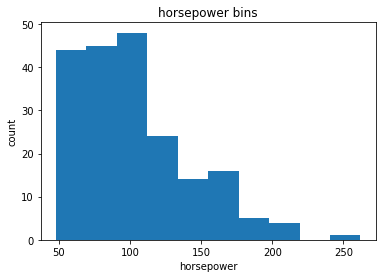

In [40]:
import matplotlib.pyplot as plt

plt.hist(df['horsepower'])

# set x/y label and plot title
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

<p>Îã§ÏùåÏùÄ NumpyÏùò <code>linspace(start_value, end_value, numbers_generated)</code> Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ <b>ÎèôÏùºÌïú ÌÅ¨Í∏∞Ïùò ÎåÄÏó≠Ìè≠ÏùÑ Í∞ÄÏßÑ 3Í∞úÏùò Íµ¨Í∞Ñ</b>ÏùÑ Ï∞æÎäî Î∞©Î≤ïÏûÖÎãàÎã§.</p>  
<p>ÎßàÎ†•(horsepower)Ïùò ÏµúÏÜåÍ∞íÏùÑ Ìè¨Ìï®ÌïòÎ†§Î©¥, <code>start_value = min(df["horsepower"])</code>Î°ú ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.</p>  
<p>ÎßàÎ†•Ïùò ÏµúÎåÄÍ∞íÏùÑ Ìè¨Ìï®ÌïòÎ†§Î©¥, <code>end_value = max(df["horsepower"])</code>Î°ú ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.</p>  
<p>ÎèôÏùºÌïú Í∏∏Ïù¥Ïùò 3Í∞úÏùò Íµ¨Í∞ÑÏùÑ ÏÉùÏÑ±ÌïòÎ†§Î©¥, 4Í∞úÏùò Íµ¨Î∂ÑÏÑ†Ïù¥ ÌïÑÏöîÌïòÎØÄÎ°ú <code>numbers_generated = 4</code>Î°ú ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.</p>

ÏúÑÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÎåÄÏó≠Ìè≠(bandwidth)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏÜåÍ∞íÏóêÏÑú ÏµúÎåÄÍ∞íÍπåÏßÄÏùò Íµ¨Í∞Ñ Î∞∞Ïó¥(bin array)ÏùÑ ÎßåÎìúÏÑ∏Ïöî. Ïù¥ Í∞íÎì§ÏùÄ ÌïòÎÇòÏùò Íµ¨Í∞ÑÏù¥ ÎÅùÎÇòÍ≥† Îã§Ïùå Íµ¨Í∞ÑÏù¥ ÏãúÏûëÎêòÎäî ÏßÄÏ†êÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§.

In [41]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

bin group Ïù¥Î¶ÑÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§:

In [42]:
group_names = ['Low', 'Medium', 'High']

<code>cut</code> Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ `df['horsepower']`Ïùò Í∞Å Í∞íÏù¥ Ïñ¥Îñ§ Íµ¨Í∞Ñ(bin)Ïóê ÏÜçÌïòÎäîÏßÄ Í≤∞Ï†ïÌïòÏÑ∏Ïöî.

In [43]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low

`include_lowest=True`Îäî Í∞ÄÏû• ÎÇÆÏùÄ Íµ¨Í∞ÑÏùò Í≤ΩÍ≥ÑÍ∞íÏùÑ Ìè¨Ìï®Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌïòÎäî Îß§Í∞úÎ≥ÄÏàòÏûÖÎãàÎã§.

<div class='alert alert-block alert-info'>
    <p>
ÏòàÎ•º Îì§Ïñ¥, bins=[10, 20, 30]Ïù¥Í≥† include_lowest=TrueÏù∏ Í≤ΩÏö∞ 10 ‚â§ x < 20Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Ï≤´ Î≤àÏß∏ Íµ¨Í∞ÑÏóê ÏÜçÌïòÍ≥†, 20 ‚â§ x < 30Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Îëê Î≤àÏß∏ Íµ¨Í∞ÑÏóê ÏÜçÌï©ÎãàÎã§. 10Í≥º Í∞ôÏùÄ Í∞íÎèÑ Ï≤´ Î≤àÏß∏ Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îê©ÎãàÎã§. </p>

Î∞òÎ©¥ include_lowest=FalseÏù∏ Í≤ΩÏö∞ 10 < x < 20Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå Ï≤´ Î≤àÏß∏ Íµ¨Í∞ÑÏóê ÏÜçÌïòÍ≥†, 20 ‚â§ x < 30Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Îëê Î≤àÏß∏ Íµ¨Í∞ÑÏóê ÏÜçÌï©ÎãàÎã§. 10Í≥º Í∞ôÏùÄ Í∞íÏùÄ Ïñ¥Îñ§ Íµ¨Í∞ÑÏóêÎèÑ ÏÜçÌïòÏßÄ ÏïäÏäµÎãàÎã§.
</div>

Í∞Å Íµ¨Í∞Ñ(bin)Ïóê ÏÜçÌïòÎäî Ï∞®ÎüâÏùò ÏàòÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.

In [44]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Plot the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

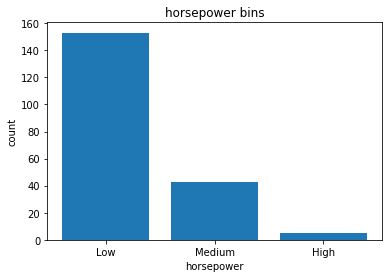

In [45]:
plt.bar(group_names, df['horsepower-binned'].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>ÏúÑ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Ï£ºÏùò ÍπäÍ≤å ÏÇ¥Ìé¥Î≥¥ÏÑ∏Ïöî. ÎßàÏßÄÎßâ Ïó¥ÏùÄ 3Í∞úÏùò Î≤îÏ£º(<code>"Low"</code>, <code>"Medium"</code>, <code>"High"</code>)Î•º Í∏∞Ï§ÄÏúºÎ°ú "horsepower"Ïùò Íµ¨Í∞ÑÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.</p>  
<p>59Í∞úÏùò Íµ¨Í∞ÑÏùÑ 3Í∞úÎ°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï¢ÅÌòîÏäµÎãàÎã§!</p>  

<h3>Íµ¨Í∞Ñ (Bins) ÏãúÍ∞ÅÌôî</h3>  
ÏùºÎ∞òÏ†ÅÏúºÎ°ú, ÏúÑÏóêÏÑú ÏÉùÏÑ±Ìïú Íµ¨Í∞ÑÏùò Î∂ÑÌè¨Î•º ÏãúÍ∞ÅÌôîÌïòÎ†§Î©¥ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

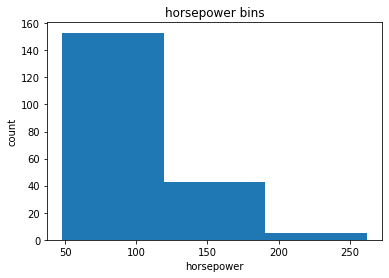

In [46]:
plt.hist(df['horsepower'], bins = 3)

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins');

ÏúÑ Í∑∏ÎûòÌîÑÎäî "horsepower" ÏÜçÏÑ±Ïóê ÎåÄÌïú Íµ¨Í∞ÑÌôî(binning) Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.

<a id=5></a>
## Indicator Variable : ÏßÄÌëú Î≥ÄÏàò  
<b>ÏßÄÌëú Î≥ÄÏàòÎûÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?</b>  
<p>  
ÏßÄÌëú Î≥ÄÏàò(ÎòêÎäî ÎçîÎØ∏ Î≥ÄÏàò)Îäî Î≤îÏ£ºÎ•º ÌëúÏãúÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî Ïà´Ïûê Î≥ÄÏàòÏûÖÎãàÎã§. 'ÎçîÎØ∏'ÎùºÍ≥† Î∂àÎ¶¨Îäî Ïù¥Ïú†Îäî Ìï¥Îãπ Ïà´Ïûê ÏûêÏ≤¥Ïóê Í≥†Ïú†Ìïú ÏùòÎØ∏Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.  
</p>  

<b>ÏßÄÌëú Î≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?</b>  
<p>  
ÏßÄÌëú Î≥ÄÏàòÎäî ÎÇòÏ§ëÏóê ÌöåÍ∑Ä Î∂ÑÏÑùÏóê Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê©ÎãàÎã§.  
</p>  

<b>ÏòàÏãú</b>  
<p>  
"fuel-type" Ïó¥ÏóêÎäî "gas"ÏôÄ "diesel"Ïù¥ÎùºÎäî Îëê Í∞ÄÏßÄ Í≥†Ïú† Í∞íÏù¥ ÏûàÏäµÎãàÎã§. ÌöåÍ∑Ä Î∂ÑÏÑùÏùÄ Îã®Ïñ¥Î•º Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïòÍ≥† Ïà´ÏûêÎßå Ïù¥Ìï¥Ìï©ÎãàÎã§. Ïù¥ ÏÜçÏÑ±ÏùÑ ÌöåÍ∑Ä Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïòÎ†§Î©¥ "fuel-type"ÏùÑ ÏßÄÌëú Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§.  
</p>  

<p>  
Pandas Î©îÏÑúÎìú <code>'get_dummies'</code>Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïó∞Î£å Ïú†Ìòï(fuel type)Ïùò Í∞Å Î≤îÏ£ºÏóê Ïà´Ïûê Í∞íÏùÑ Ìï†ÎãπÌïòÏÑ∏Ïöî.  
</p>  

In [47]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [48]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

Change the column names for clarity:

In [49]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

fuel-type-diesel  fuel-type-gas
0                 0              1
1                 0              1
2                 0              1
3                 0              1
4                 0              1

In [50]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis =1 , inplace=True)

In [51]:
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-L/100km    price  \
0                9.0         111    5000.0       21        8.703704  13495.0   
1                9.0         111    5000.0       21        8.703704  16500.0   
2                9.0         154    5000.0       19        9.038462  16500.0   
3               10.0         102    5500.0       24        7.833333  13950.0   
4                8.0         115    5500.0       18       10.681818  17450.0   

  city-L/100km  horsepower-binned  fuel-type-diesel  fuel-type-gas  
0    11.190476                Low                 0              1  
1    11.190476                Low                 0              1  
2    12.368421             Medium                 0              1  
3     9.791667                Low                 0              1  
4    13.055556                Low                 0              1  

[5 rows x 29 columns]

ÎßàÏßÄÎßâ Îëê Ïó¥ÏùÄ Ïù¥Ï†ú fuel-type Î≥ÄÏàòÏùò ÏßÄÌëú Î≥ÄÏàò ÌëúÌòÑÏûÖÎãàÎã§. Ïù¥ Í∞íÎì§ÏùÄ Î™®Îëê 0Í≥º 1Î°ú Î≥ÄÌôòÎêòÏóàÏäµÎãàÎã§.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>


<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>
</div>


In [56]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace=True)
df.drop('aspiration', axis=1, inplace=True)
df = pd.concat([df, dummy_variable_2], axis = 1)

In [57]:
df.head()

symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  peak-rpm  \
0          rwd           front        88.6  0.811148  0.890278  ...    5000.0   
1          rwd           front        88.6  0.811148  0.890278  ...    5000.0   
2          rwd           front        94.5  0.822681  0.909722  ...    5000.0   
3          fwd           front        99.8  0.848630  0.919444  ...    5500.0   
4          4wd           front        99.4  0.848630  0.922222  ...    5500.0   

   city-mpg highway-L/100km    price  city-L/100km horsepower-binned  \
0        21        8.703704  13495.0     11.190476               Low   
1        21        8.703704  16500.0     11.190476               Low   
2        19        9.038462  16500.0     12.368421            Medium   
3        24        7.833333  13950.0      9.791667               Low   
4        18       10.681818  17450.0     13.055556               Low   

   fuel-type-diesel  fuel-type-gas  aspiration-std  aspiration-turbo  
0                 0              1               1                 0  
1                 0              1               1                 0  
2                 0              1               1                 0  
3                 0              1               1                 0  
4                 0              1               1                 0  

[5 rows x 30 columns]

Save the new csv:

In [ ]:
df.to_csv('clean_df.csv')

### Thank you for completing this lab!

<hr>

# **Hands-on Practice Lab: Data Wrangling**


Ïù¥ Ïã§ÏäµÏóêÏÑúÎäî Î™®ÎìàÏóêÏÑú ÏäµÎìùÌïú Í∏∞Ïà†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÜçÏÑ±Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ ÏàòÏ†ïÌïòÎ©∞, Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌäπÏ†ï ÏÜçÏÑ±Ïóê ÎåÄÌï¥ Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôîÏôÄ Ï†ïÍ∑úÌôî Í≥ºÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file_path, header = 0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [65]:
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837

 
`numpy.round()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ `Screen_Size_cm` Ïó¥Ïùò Î™®Îì† Í∞íÏùÑ ÏÜåÏàòÏ†ê Îëê ÏûêÎ¶¨Î°ú Î∞òÏò¨Î¶ºÌïòÎèÑÎ°ù ÏóÖÎç∞Ïù¥Ìä∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [68]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           35.56            1.6       8             256       1.60    978  
1           39.62            2.0       4             256       2.20    634  
2           39.62            2.7       8             256       2.20    946  
3           33.78            1.6       8             128       1.22   1244  
4           39.62            1.8       8             256       1.91    837

# Task - 1


### Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä  
ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Îäî Ïù¥Ï†ÑÏóê '?'ÏóêÏÑú `numpy.NaN`ÏúºÎ°ú Î≥ÄÌôòÎêòÏóàÏäµÎãàÎã§. PandasÎäî NaNÍ≥º Null Í∞íÏùÑ ÎèôÏùºÌïòÍ≤å Ï∑®Í∏âÌï©ÎãàÎã§. Ï¶â, Null Í∞íÏùÑ Í∞ÄÏßÑ Ìï≠Î™©ÏùÑ ÏãùÎ≥ÑÌïòÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§. ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ïó¥ÏùÑ ÏãùÎ≥ÑÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

In [69]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

# Task - 2  

### ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥  
Ïó∞ÏÜç Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏÜçÏÑ±ÏóêÏÑú ÎàÑÎùΩÎêú Í∞íÏùÄ ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÏäµÎãàÎã§. "Weight_kg" ÏÜçÏÑ±Ïùò Í∞íÏù¥ Ïó∞ÏÜçÏ†ÅÏù¥Î©∞ ÏùºÎ∂Ä Í∞íÏù¥ ÎàÑÎùΩÎêòÏñ¥ ÏûàÏùåÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ ÏÜçÏÑ±Ïùò ÎàÑÎùΩÎêú Í∞íÏùÑ ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.  

In [72]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [73]:
avg_weight_kg = df['Weight_kg'].mean()
df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)

### Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Í∞íÏúºÎ°ú ÎåÄÏ≤¥  
Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏÜçÏÑ±ÏóêÏÑú ÎàÑÎùΩÎêú Í∞íÏùÄ Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÏäµÎãàÎã§. "Screen_Size_cm" ÏÜçÏÑ±Ïùò Í∞íÏù¥ Î≤îÏ£ºÌòïÏù¥Î©∞ ÏùºÎ∂Ä Í∞íÏù¥ ÎàÑÎùΩÎêòÏñ¥ ÏûàÏùåÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ ÏÜçÏÑ±Ïùò ÎàÑÎùΩÎêú Í∞íÏùÑ Ìï¥Îãπ ÏÜçÏÑ±Ïùò Í∞ÄÏû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

In [77]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [80]:
df['Screen_Size_cm'].value_counts()

39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: Screen_Size_cm, dtype: int64

In [82]:
most_frequent_value = df['Screen_Size_cm'].value_counts().idxmax()
most_frequent_value

39.62

In [83]:
df['Screen_Size_cm'].replace(np.nan, most_frequent_value, inplace=True)

# Task - 3

 

### Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï ÏàòÏ†ï  
"Weight_kg"ÏôÄ "Screen_Size_cm" Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏù¥ "Object"Î°ú ÎêòÏñ¥ ÏûàÏúºÎÇò, Îëê Ïó¥ Î™®Îëê "float" Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ Í∞ÄÏ†∏Ïïº Ìï©ÎãàÎã§. Ïù¥ Îëê Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ ÏàòÏ†ïÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.  

In [85]:
df[['Weight_kg', 'Screen_Size_cm']] = df[['Weight_kg', 'Screen_Size_cm']].astype(float)

# Task - 4



### Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî  
`Screen_Size` Í∞íÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïù∏Ïπò Îã®ÏúÑÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïù¥ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, ÎÖ∏Ìä∏Î∂ÅÏùò Î¨¥Í≤åÎäî ÌååÏö¥Îìú Îã®ÏúÑÎ°ú Î≥ÄÍ≤ΩÎêòÏñ¥Ïïº Ìï©ÎãàÎã§. ÏïÑÎûòÏùò Î≥ÄÌôò Îã®ÏúÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïó¥ÏùÑ ÏàòÏ†ïÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî. ÎòêÌïú, Ïó¥ Ïù¥Î¶ÑÎèÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÏÑ∏Ïöî.  

```{math}
1 Ïù∏Ïπò = 2.54 cm  
1 kg = 2.205 ÌååÏö¥Îìú  
```

In [97]:
df['Screen_Size_cm'] = df.Screen_Size_cm / 2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace = True)

In [98]:
df['Weight_kg'] = df.Weight_kg * 2.205
df.rename(columns = {'Weight_kg':'Weight_pounds'}, inplace=True)


### Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî  
Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ±ÏùÄ Ï¢ÖÏ¢Ö Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÏµúÎåÄÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú "CPU_frequency" ÏÜçÏÑ±ÏùÑ Ï†ïÍ∑úÌôîÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

In [102]:
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

# Task - 5


### Íµ¨Í∞ÑÌôî (Binning)  
Íµ¨Í∞ÑÌôîÎäî Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Î•º ÏßÄÏ†ïÎêú Í∑∏Î£π ÏàòÎ°ú ÎÇòÎàÑÏñ¥ Î≤îÏ£ºÌòï ÏÜçÏÑ±ÏùÑ ÏÉùÏÑ±ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§. Ïù¥Î≤àÏóêÎäî "Price" ÏÜçÏÑ±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú 3Í∞úÏùò Íµ¨Í∞ÑÏùÑ ÏÉùÏÑ±ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî. Ïù¥ Íµ¨Í∞ÑÏùÄ "Low", "Medium", "High"Î°ú Ïù¥Î¶ÑÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§. ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÏÜçÏÑ±Ïùò Ïù¥Î¶ÑÏùÄ "Price-binned"ÏûÖÎãàÎã§.

In [104]:
df.Price.dtypes

dtype('int64')

In [108]:
# 3Í∞úÏùò Íµ¨Í∞ÑÏù¥ ÌïÑÏöîÌïòÎ†§Î©¥ 4Í∞úÏùò Íµ¨Î∂ÑÏÑ†Ïù¥ ÌïÑÏöî
bins = np.linspace(min(df.Price), max(df.Price), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [110]:
group_names = ['Low', 'Medium', 'High']

df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

Also, plot the bar graph of these bins.

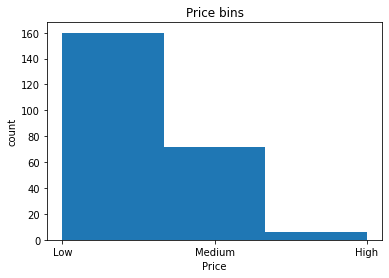

In [113]:
import matplotlib.pyplot as plt

plt.hist(df['Price-binned'], bins = 3)
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins");

# Task - 6


### ÏßÄÌëú Î≥ÄÏàò (Indicator variables)  
Îç∞Ïù¥ÌÑ∞ÏÖãÏùò "Screen" ÏÜçÏÑ±ÏùÑ Îëê Í∞úÏùò ÏßÄÌëú Î≥ÄÏàò, "Screen-IPS_panel"Í≥º "Screen-Full_HD"Î°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî. Í∑∏Îü∞ Îã§Ïùå Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú "Screen" ÏÜçÏÑ±ÏùÑ ÏÇ≠Ï†úÌïòÏÑ∏Ïöî.

In [117]:
screen_variables = pd.get_dummies(df.Screen)
screen_variables.rename(columns={'Full HD':'Screen-Full_HD','IPS Panel':'Screen-IPS_panel'}, inplace=True)
screen_variables

Screen-Full_HD  Screen-IPS_panel
0                 0                 1
1                 1                 0
2                 1                 0
3                 0                 1
4                 1                 0
..              ...               ...
233               0                 1
234               1                 0
235               0                 1
236               1                 0
237               1                 0

[238 rows x 2 columns]

In [119]:
df = pd.concat([df, screen_variables], axis = 1)

In [120]:
df.drop('Screen', axis = 1, inplace=True)

In [121]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inch', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price-binned', 'Screen-Full_HD',
       'Screen-IPS_panel'],
      dtype='object')

In [122]:
df.head()

Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0               0                 1  
1               1                 0  
2               1                 0  
3               0                 1  
4               1                 0

# Congratulations! You have completed the lab
